<img src="images/ppo_cover.jpg" width=25% align="right"/>
# Proximal Policy Optimization Algorithms
Author: Jin Yeom (jinyeom@utexas.edu)  
Original authors: John Schulman, Filip Wolski, Prafulla Dhariwal, Alec Radford, Oleg Klimov

## Contents
- [Implementation](#Implementation)
    - [Environment](#Environment)
    - [Policy](#Policy)
    - [PPO](#PPO)
- [Training](#Training)
- [References](#References)

**[Proximal Policy Optimization (PPO)](https://arxiv.org/abs/1707.06347)** algorithms are a set of policy gradient algorithms with a novel loss function,

$$
L^{CLIP}(\theta) = E[min(r_t(\theta)A_t, clip(r_t(\theta)A_t, 1 - \epsilon, 1 + \epsilon)A_t)] 
$$

which extends [TRPO algorithm](https://arxiv.org/abs/1502.05477), but is simpler to implement while showing SOTA performance.

In [1]:
import gym
import torch
from torch import nn
from torch.nn import functional as F
from torch.autograd import Variable
from matplotlib import pyplot as plt
from IPython import display
import numpy as np
from baselines.common.atari_wrappers import make_atari, wrap_deepmind

## Implementation

This implementation refers to [OpenAI's TensorFlow implementation](https://github.com/openai/baselines), as it provides not only a working implementation of the algorithm, but also because it includes other components that make the algorithm work, e.g., a wrapper for Atari environments that is better to work with. This notebook will focus on learning how the algorithm works.

### Policy

In [2]:
class NatureDQN(nn.Module):
    def __init__(self, in_channels=4, act_dim=18):
        super(NatureDQN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 32, kernel_size=8, stride=4)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1)
        self.fc4 = nn.Linear(7 * 7 * 64, 512)
        self.fc5 = nn.Linear(512, act_dim)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc4(x))
        return self.fc5(x)

In [3]:
model = NatureDQN()
n_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of trainable parameters: {n_params}")

Number of trainable parameters: 1693362


### Environment

In [4]:
def render(env, t):
    display.clear_output(wait=True)
    plt.figure()
    plt.clf()
    plt.axis("off")
    plt.title(f"t = {t}")
    plt.imshow(env.render(mode='rgb_array'))
    plt.pause(0.001)

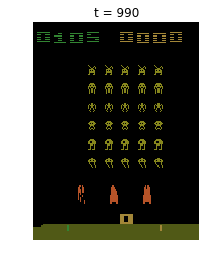

In [6]:
env = wrap_deepmind(make_atari("SpaceInvadersNoFrameskip-v4"))
obs = env.reset()
for t in range(1000):
    if t % 10 == 0:
        render(env, t)
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)

### PPO

## Training

## References

- https://arxiv.org/abs/1707.06347 (Proximal Policy Optimization Algorithms)
- https://arxiv.org/abs/1502.05477 (Trust Region Policy Optimization)